In [36]:
import json
import os
import time
import datetime
import numpy as np
import matplotlib
from collections import Counter
import matplotlib.pyplot as plt


In [37]:
os.listdir('train/labels')

['socal-fire_00000091_post_disaster.json',
 'midwest-flooding_00000308_post_disaster.json',
 'mexico-earthquake_00000164_post_disaster.json',
 'midwest-flooding_00000207_pre_disaster.json',
 'hurricane-michael_00000166_pre_disaster.json',
 'socal-fire_00001292_post_disaster.json',
 'hurricane-michael_00000133_post_disaster.json',
 'socal-fire_00000243_post_disaster.json',
 'midwest-flooding_00000249_pre_disaster.json',
 'hurricane-matthew_00000093_pre_disaster.json',
 'hurricane-michael_00000349_post_disaster.json',
 'socal-fire_00001298_pre_disaster.json',
 'socal-fire_00000581_post_disaster.json',
 'hurricane-harvey_00000289_pre_disaster.json',
 'santa-rosa-wildfire_00000119_post_disaster.json',
 'midwest-flooding_00000172_post_disaster.json',
 'palu-tsunami_00000191_post_disaster.json',
 'socal-fire_00001040_post_disaster.json',
 'socal-fire_00000529_post_disaster.json',
 'hurricane-harvey_00000286_post_disaster.json',
 'hurricane-matthew_00000239_post_disaster.json',
 'socal-fire_0

In [38]:
building = 'building'
no_damage = 'no-damage'
destroyed = 'destroyed'
minor_damage = 'minor-damage'
major_damage = 'major-damage'
unclassified = 'un-classified'
features = 'features'
lng_lat = 'lng_lat'
properties = 'properties'
disaster = 'disaster'
disaster_type = 'disaster_type'
feature_type = 'feature_type'
metadata = 'metadata'
wind_disaster = 'wind'
volcano_disaster = 'volcano'
properties = 'properties'
subtype = 'subtype'
eye_in_the_sky_path = 'train/labels'






In [39]:
def get_pre_disaster(json_files):
    '''Returns post_disaster files from directory'''
    post_disasters = filter(lambda x: 'pre_disaster' in x, json_files)
    return post_disasters

In [40]:
def get_count_building(json_file):
    '''Open a json file corresponding to a label file and returns number of building in that file'''
    data = json.load(json_file)
    list_features = data[features][lng_lat]
    list_building = filter(lambda x: x[properties][feature_type]==building,list_features)
    return len(list_building)

In [41]:
def get_building_type(json_file):
    '''Open a json file corresponding to a label file and returns type of building in that file for post_disaster_file'''
    data = json.load(json_file)
    list_features = data[features][lng_lat]
    list_building = filter(lambda x: x[properties][feature_type]==building,list_features)
    building_type = list(map(lambda x: x[properties][subtype],list_building))
    return building_type

In [42]:
def get_disaster_type(json_file):
    '''Open a json file corresponding to a label file and returns type of disaster corresponding to that file'''
    data = json.load(json_file)
    disaster_type_name = data[metadata][disaster_type]
    return disaster_type_name

In [43]:
def get_post_disaster(json_files):
    '''Returns post_disaster files from directory'''
    post_disasters = filter(lambda x: 'post_disaster' in x, json_files)
    return post_disasters

In [89]:
def from_counter_to_pct(counter):
    dict_counter = dict(counter)
    total = float(sum(dict_counter.values()))
    for key in dict_counter.keys():
        dict_counter[key]= (dict_counter[key]/total)*100.0
    return dict_counter

In [ ]:
def identify_all_no_damage_only(pct):
    return pct[no_damage]==100.0


In [112]:
def stringify_list(l):
    l.sort()
    final_string = ''
    for i in l:
        final_string+=i
        final_string+='_'
    return final_string

In [55]:
#Building_Count 
json_files = os.listdir(eye_in_the_sky_path)
pre_disaster_files = get_pre_disaster(json_files)
building_count = []
for img in json_files:
    file_path = os.path.join(eye_in_the_sky_path,img)
    with open(file_path) as json_file:
        building_count.append(get_count_building(json_file))
    

In [56]:
len(pre_disaster_files)

2799

In [57]:
np.mean(building_count)

58.221150410861021

In [58]:
np.median(building_count)

17.0

In [59]:
np.std(building_count)

118.30375837397359

In [60]:
 building_counter = Counter(building_count)

In [61]:
building_counter

Counter({0: 1032,
         1: 216,
         2: 152,
         3: 176,
         4: 118,
         5: 130,
         6: 102,
         7: 96,
         8: 116,
         9: 92,
         10: 84,
         11: 96,
         12: 64,
         13: 74,
         14: 78,
         15: 86,
         16: 62,
         17: 52,
         18: 58,
         19: 62,
         20: 62,
         21: 46,
         22: 48,
         23: 42,
         24: 58,
         25: 52,
         26: 48,
         27: 38,
         28: 28,
         29: 28,
         30: 48,
         31: 44,
         32: 28,
         33: 32,
         34: 26,
         35: 44,
         36: 30,
         37: 26,
         38: 26,
         39: 26,
         40: 20,
         41: 26,
         42: 28,
         43: 22,
         44: 26,
         45: 20,
         46: 22,
         47: 22,
         48: 34,
         49: 22,
         50: 16,
         51: 24,
         52: 18,
         53: 20,
         54: 24,
         55: 8,
         56: 18,
         57: 22,
         58: 22,

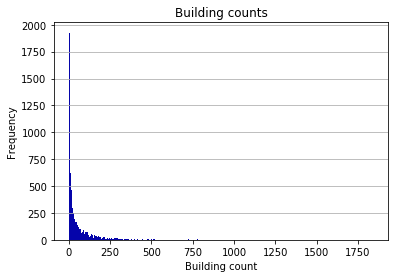

In [62]:
#plot

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=building_count, bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Building count')
plt.ylabel('Frequency')
plt.title('Building counts')


In [67]:
#Damage Type Count
json_files = os.listdir(eye_in_the_sky_path)
post_disaster_files = get_post_disaster(json_files)
damage_count = []
for img in post_disaster_files:
    file_path = os.path.join(eye_in_the_sky_path,img)
    with open(file_path) as json_file:
        damage_count.append(get_disaster_type(json_file))

In [68]:
damage_counter = Counter(damage_count)

In [90]:
from_counter_to_pct(damage_counter)

{u'earthquake': 4.322972490175062,
 u'fire': 37.47767059664166,
 u'flooding': 32.76170060735977,
 u'tsunami': 4.037156127188282,
 u'volcano': 0.6430868167202572,
 u'wind': 20.75741336191497}

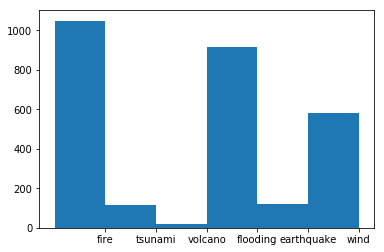

In [70]:
labels, values = zip(*Counter(damage_count).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [80]:
#Building_Damage_Type
json_files = os.listdir(eye_in_the_sky_path)
post_disaster_files = get_post_disaster(json_files)
building_damages = []
for img in post_disaster_files:
    file_path = os.path.join(eye_in_the_sky_path,img)
    with open(file_path) as json_file:
        building_damages+=get_building_type(json_file)

In [82]:
building_damage_type_counter = Counter(building_damages)

In [83]:
building_damage_type_counter

Counter({u'destroyed': 13230,
         u'major-damage': 14161,
         u'minor-damage': 14983,
         u'no-damage': 117594,
         u'un-classified': 2993})

In [85]:
dict(building_damage_type_counter)

{u'destroyed': 13230,
 u'major-damage': 14161,
 u'minor-damage': 14983,
 u'no-damage': 117594,
 u'un-classified': 2993}

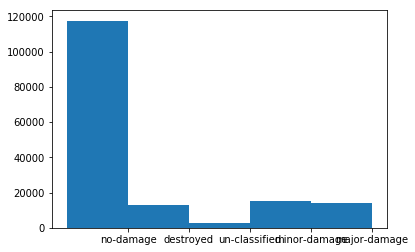

In [84]:
labels, values = zip(*Counter(building_damages).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [94]:
#Damage Co Occurence
json_files = os.listdir(eye_in_the_sky_path)
post_disaster_files = get_post_disaster(json_files)
building_damages_counters = []
for img in post_disaster_files:
    file_path = os.path.join(eye_in_the_sky_path,img)
    with open(file_path) as json_file:
        building_damages_counters.append(from_counter_to_pct(Counter(get_building_type(json_file))))

In [103]:
building_damages_counters[2].keys()

[u'no-damage', u'un-classified']

In [115]:
building_damages_counters
damage_tuples = []

In [116]:
for co_occurence in building_damages_counters:
    damage_tuples.append(stringify_list(co_occurence.keys()))


In [118]:
Counter(damage_tuples)

Counter({'': 516,
         u'destroyed_': 92,
         u'destroyed_major-damage_': 53,
         u'destroyed_major-damage_minor-damage_': 41,
         u'destroyed_major-damage_minor-damage_no-damage_': 133,
         u'destroyed_major-damage_minor-damage_no-damage_un-classified_': 118,
         u'destroyed_major-damage_minor-damage_un-classified_': 45,
         u'destroyed_major-damage_no-damage_': 66,
         u'destroyed_major-damage_no-damage_un-classified_': 30,
         u'destroyed_major-damage_un-classified_': 20,
         u'destroyed_minor-damage_': 17,
         u'destroyed_minor-damage_no-damage_': 38,
         u'destroyed_minor-damage_no-damage_un-classified_': 21,
         u'destroyed_minor-damage_un-classified_': 10,
         u'destroyed_no-damage_': 132,
         u'destroyed_no-damage_un-classified_': 62,
         u'destroyed_un-classified_': 19,
         u'major-damage_': 125,
         u'major-damage_minor-damage_': 38,
         u'major-damage_minor-damage_no-damage_': 129,


In [119]:
from_counter_to_pct(Counter(damage_tuples))

{'': 18.435155412647376,
 u'destroyed_': 3.2868881743479816,
 u'destroyed_major-damage_': 1.8935334047874242,
 u'destroyed_major-damage_minor-damage_': 1.4648088603072527,
 u'destroyed_major-damage_minor-damage_no-damage_': 4.751697034655234,
 u'destroyed_major-damage_minor-damage_no-damage_un-classified_': 4.215791354055019,
 u'destroyed_major-damage_minor-damage_un-classified_': 1.607717041800643,
 u'destroyed_major-damage_no-damage_': 2.3579849946409435,
 u'destroyed_major-damage_no-damage_un-classified_': 1.0718113612004287,
 u'destroyed_major-damage_un-classified_': 0.7145409074669525,
 u'destroyed_minor-damage_': 0.6073597713469097,
 u'destroyed_minor-damage_no-damage_': 1.3576277241872097,
 u'destroyed_minor-damage_no-damage_un-classified_': 0.7502679528403001,
 u'destroyed_minor-damage_un-classified_': 0.35727045373347627,
 u'destroyed_no-damage_': 4.715969989281887,
 u'destroyed_no-damage_un-classified_': 2.2150768131475527,
 u'destroyed_un-classified_': 0.6788138620936048,
 u

In [111]:
file_1 = os.path.join(eye_in_the_sky_path, os.listdir(eye_in_the_sky_path)[1])

with open(file_1) as json_file:
    print(get_building_type(json_file))

[u'no-damage', u'no-damage', u'no-damage', u'no-damage', u'no-damage', u'no-damage']


In [8]:
disaster_type_set = set()

In [9]:
count = 0
for img in os.listdir(eye_in_the_sky_path):
  file_path = os.path.join(eye_in_the_sky_path,img)
  with open(file_path) as json_file:
    data = json.load(json_file)
    count+=1
    if count %50 == 0:
      print(count)
      print(datetime.datetime.now())
    disaster_type_name = data[metadata][disaster_type]
    disaster_type_set.add(disaster_type_name)
print(disaster_type_set)

50
2019-10-07 13:38:51.322258
100
2019-10-07 13:38:51.579987
150
2019-10-07 13:38:51.843032
200
2019-10-07 13:38:52.049033
250
2019-10-07 13:38:52.229101
300
2019-10-07 13:38:52.445892
350
2019-10-07 13:38:52.710310
400
2019-10-07 13:38:52.922999
450
2019-10-07 13:38:53.168464
500
2019-10-07 13:38:53.399291
550
2019-10-07 13:38:53.590314
600
2019-10-07 13:38:53.785175
650
2019-10-07 13:38:53.967482
700
2019-10-07 13:38:54.181870
750
2019-10-07 13:38:54.323103
800
2019-10-07 13:38:54.570109
850
2019-10-07 13:38:54.787918
900
2019-10-07 13:38:54.983686
950
2019-10-07 13:38:55.151713
1000
2019-10-07 13:38:55.337778
1050
2019-10-07 13:38:55.526375
1100
2019-10-07 13:38:55.704183
1150
2019-10-07 13:38:55.878801
1200
2019-10-07 13:38:56.055715
1250
2019-10-07 13:38:56.271744
1300
2019-10-07 13:38:56.452178
1350
2019-10-07 13:38:56.594894
1400
2019-10-07 13:38:56.763330
1450
2019-10-07 13:38:56.930756
1500
2019-10-07 13:38:57.136268
1550
2019-10-07 13:38:57.276834
1600
2019-10-07 13:38:57.354